In [1]:
import pandas as pd
import nflfastpy as nfl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.DataFrame()

for x in range(2015,2022):
    yearly_df = nfl.load_pbp_data(x)
    df = pd.concat([df, yearly_df])

In [4]:
df.shape

(289707, 372)

In [56]:
for column in df.columns:
    if 'rush' in column:
        print(column)
    elif 'distance' in column:
        print(column)
    elif 'yardline' in column:
        print(column)
    elif 'two' in column:
        print(column)

yardline_100
kick_distance
two_point_conv_result
two_point_conversion_prob
total_home_rush_epa
total_away_rush_epa
total_home_rush_wpa
total_away_rush_wpa
first_down_rush
rush_attempt
rush_touchdown
two_point_attempt
lateral_rush
rusher_player_id
rusher_player_name
rushing_yards
lateral_rusher_player_id
lateral_rusher_player_name
lateral_rushing_yards
defensive_two_point_attempt
defensive_two_point_conv
rusher
rusher_jersey_number
rush
rusher_id


In [3]:
rushing_df_filter = (df['rush_attempt'] == 1) & (df['two_point_attempt'] == 0)

rushing_df = df.loc[rushing_df_filter, ['rush_attempt', 'rush_touchdown', 'yardline_100']]

prob_rush_df = rushing_df.groupby('yardline_100')['rush_touchdown'].value_counts(normalize=True)
"""
Grouping by yardline of where each rush attempt began and then using value_counts to count if the attempt resulted in a touchdown.
Within the value_counts, the argument normalize is set to True, allowing for calculation of the proportion of rush attempts that 
result in touchdowns from each yardline. Doing this transforms the dataframe into a series so we must convert it back to a dataframe.
"""
# prob_rush_df = prob_rush_df.to_frame(name = 'probability_of_td')
prob_rush_df = pd.DataFrame({
    'probability_of_touchdown': prob_rush_df.values
}, index=prob_rush_df.index).reset_index()
prob_rush_df.head()

,yardline_100,rush_touchdown,probability_of_touchdown
0,1.0,1.0,0.564392
1,1.0,0.0,0.435608
2,2.0,0.0,0.565806
3,2.0,1.0,0.434194
4,3.0,0.0,0.662411


In [4]:
prob_rush_df = prob_rush_df.loc[prob_rush_df['rush_touchdown'] == 1, ['yardline_100', 'probability_of_touchdown']].reset_index()
prob_rush_df = prob_rush_df.drop('index', axis=1)
prob_rush_df.head()

,yardline_100,probability_of_touchdown
0,1.0,0.564392
1,2.0,0.434194
2,3.0,0.337589
3,4.0,0.295552
4,5.0,0.228758


In [41]:
prob_rush_df.shape

(92, 2)

<AxesSubplot:xlabel='yardline_100'>

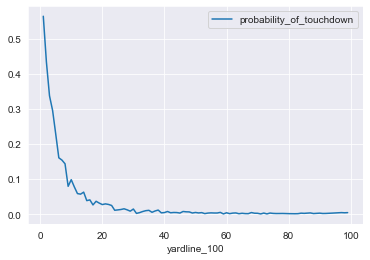

In [5]:
# plt.plot(data=prob_rush_df, x='yardline_100', y='probability_of_touchdown')
# plt.title('Probability of scoring a rushing TD on an attempt X yds from endzone')
# plt.xlabel('Distance from endzone')

prob_rush_df.plot(x='yardline_100', y='probability_of_touchdown')

In [41]:
df_2021 = nfl.load_pbp_data(2021)
df_2021.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652


In [42]:
roster_df = nfl.load_roster_data(2021)
roster_df.head()

,season,team,position,depth_chart_position,jersey_number,status,full_name,first_name,last_name,birth_date,...,espn_id,sportradar_id,yahoo_id,rotowire_id,pff_id,pfr_id,fantasy_data_id,sleeper_id,years_exp,headshot_url
0,2021,ARI,CB,RCB,7,Active,Byron Murphy,Byron,Murphy,1998-01-18,...,4038999.0,c025b513-9431-4097-bc25-9777bf08f846,31865.0,13560.0,44027.0,MurpBy00,20888.0,5864,3.0,https://static.www.nfl.com/image/private/f_aut...
1,2021,ARI,CB,LCB,21,Active,Breon Borders,Breon,Borders,1995-07-22,...,3048663.0,d0fa2103-69a1-4ed0-a3cd-4eb8d5e342c2,30623.0,12097.0,39398.0,BordBr00,19300.0,4439,5.0,https://static.www.nfl.com/image/private/f_aut...
2,2021,ARI,CB,RCB,33,Active,Antonio Hamilton,Antonio,Hamilton,1993-01-24,...,3056354.0,9bc107dc-1920-49db-b009-436d1a77955d,29957.0,11518.0,11353.0,HamiAn01,18658.0,3838,6.0,https://static.www.nfl.com/image/private/f_aut...
3,2021,ARI,CB,NaN,39,Active,Jace Whittaker,Jace,Whittaker,1995-07-16,...,3821572.0,528bf5c9-1d23-40c3-adda-df21f8f0e2ab,33089.0,14793.0,50465.0,WhitJa05,22171.0,7169,2.0,https://static.www.nfl.com/image/private/f_aut...
4,2021,ARI,CB,NaN,24,Active,Bashaud Breeland,Bashaud,Breeland,1992-01-30,...,16890.0,ba905b34-8412-4553-9055-3460368cc608,27630.0,9648.0,8737.0,BreeBa00,16407.0,2091,8.0,https://static.www.nfl.com/image/private/f_aut...


In [43]:
rb_roster_df = roster_df.loc[roster_df['position'] == 'RB']['gsis_id']

rb_roster_df.head()

60    00-0034331
61    00-0034681
62    00-0036383
63    00-0033553
64    00-0035825
Name: gsis_id, dtype: object

In [44]:
from nflfastpy.utils import convert_to_gsis_id
from nflfastpy import default_headshot

rush_2021_df = df_2021.loc[df_2021['rush_attempt']== 1, ['rusher_id','rusher_player_name','rush_attempt', 'rush_touchdown', 'yardline_100']]
rush_2021_df = rush_2021_df.loc[rush_2021_df['rusher_id'].notnull()]
rush_2021_df['gsis_id'] = rush_2021_df['rusher_id'].apply(convert_to_gsis_id)
rush_2021_df = rush_2021_df.loc[rush_2021_df['rusher_id'].isin(rb_roster_df)]
rush_2021_df.head()

,rusher_id,rusher_player_name,rush_attempt,rush_touchdown,yardline_100,gsis_id
2,00-0032764,D.Henry,1.0,0.0,75.0,
10,00-0034681,C.Edmonds,1.0,0.0,9.0,
18,00-0032764,D.Henry,1.0,0.0,80.0,
28,00-0032764,D.Henry,1.0,0.0,75.0,
29,00-0032764,D.Henry,1.0,0.0,73.0,


In [45]:
rush_2021_df = rush_2021_df.merge(prob_rush_df, on = 'yardline_100', how = 'left')

rush_2021_df.head(20)

,rusher_id,rusher_player_name,rush_attempt,rush_touchdown,yardline_100,gsis_id,probability_of_touchdown
0,00-0032764,D.Henry,1.0,0.0,75.0,,0.002249
1,00-0034681,C.Edmonds,1.0,0.0,9.0,,0.079480
2,00-0032764,D.Henry,1.0,0.0,80.0,,0.001558
3,00-0032764,D.Henry,1.0,0.0,75.0,,0.002249
4,00-0032764,D.Henry,1.0,0.0,73.0,,0.000837
5,00-0034681,C.Edmonds,1.0,0.0,65.0,,0.002581
6,00-0032764,D.Henry,1.0,0.0,68.0,,0.004598
7,00-0032764,D.Henry,1.0,0.0,69.0,,0.002793
8,00-0033553,J.Conner,1.0,0.0,45.0,,0.003247
9,00-0034681,C.Edmonds,1.0,0.0,42.0,,0.004077


In [46]:
rush_2021_df = rush_2021_df.drop('gsis_id', axis=1)

rush_2021_df.head()

,rusher_id,rusher_player_name,rush_attempt,rush_touchdown,yardline_100,probability_of_touchdown
0,00-0032764,D.Henry,1.0,0.0,75.0,0.002249
1,00-0034681,C.Edmonds,1.0,0.0,9.0,0.079480
2,00-0032764,D.Henry,1.0,0.0,80.0,0.001558
3,00-0032764,D.Henry,1.0,0.0,75.0,0.002249
4,00-0032764,D.Henry,1.0,0.0,73.0,0.000837


In [47]:
rush_2021_df = rush_2021_df.rename(columns={'rusher_id':'gsis_id'})

rush_2021_df.head()

,gsis_id,rusher_player_name,rush_attempt,rush_touchdown,yardline_100,probability_of_touchdown
0,00-0032764,D.Henry,1.0,0.0,75.0,0.002249
1,00-0034681,C.Edmonds,1.0,0.0,9.0,0.079480
2,00-0032764,D.Henry,1.0,0.0,80.0,0.001558
3,00-0032764,D.Henry,1.0,0.0,75.0,0.002249
4,00-0032764,D.Henry,1.0,0.0,73.0,0.000837


In [48]:
rush_2021_df = rush_2021_df.groupby('gsis_id', as_index=False).agg({
    'rusher_player_name': 'first', 'rush_touchdown': 'sum', 'probability_of_touchdown': 'sum'
}).rename({
    'probability_of_touchdown':'expected_touchdowns', 'rush_touchdown': 'season_rush_td_total'
}, axis=1)

rush_2021_df['positive_regression'] = rush_2021_df['season_rush_td_total'] < rush_2021_df['expected_touchdowns']
rush_2021_df['delta'] = rush_2021_df.apply(
    lambda x: abs(x.expected_touchdowns - x.season_rush_td_total), axis=1
)

rush_2021_df.sort_values(by='expected_touchdowns', ascending=False).head()

,gsis_id,rusher_player_name,season_rush_td_total,expected_touchdowns,positive_regression,delta
110,00-0036223,J.Taylor,18.0,16.903730,False,1.096270
46,00-0033897,J.Mixon,14.0,12.959401,False,1.040599
39,00-0033553,J.Conner,16.0,11.979580,False,4.020420
95,00-0035657,D.Harris,15.0,10.182510,False,4.817490
33,00-0033045,E.Elliott,10.0,10.059096,True,0.059096


In [57]:
rush_2021_df.sort_values(by='delta', ascending=False).head(36)

,gsis_id,rusher_player_name,season_rush_td_total,expected_touchdowns,positive_regression,delta
95,00-0035657,D.Harris,15.0,10.182510,False,4.817490
82,00-0035243,M.Sanders,0.0,4.642820,True,4.642820
77,00-0034845,S.Michel,4.0,8.184262,True,4.184262
39,00-0033553,J.Conner,16.0,11.979580,False,4.020420
45,00-0033893,D.Cook,6.0,9.851637,True,3.851637
47,00-0033906,A.Kamara,4.0,7.757386,True,3.757386
148,00-0036997,J.Williams,4.0,7.032496,True,3.032496
88,00-0035311,M.Gaskin,3.0,5.839788,True,2.839788
70,00-0034750,R.Penny,6.0,3.180518,False,2.819482
16,00-0032058,T.Coleman,0.0,2.797606,True,2.797606


/Users/brandynklee/Python_Projects/fantasy_footballl_22/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Actual Rushing TD for 2021 Season')

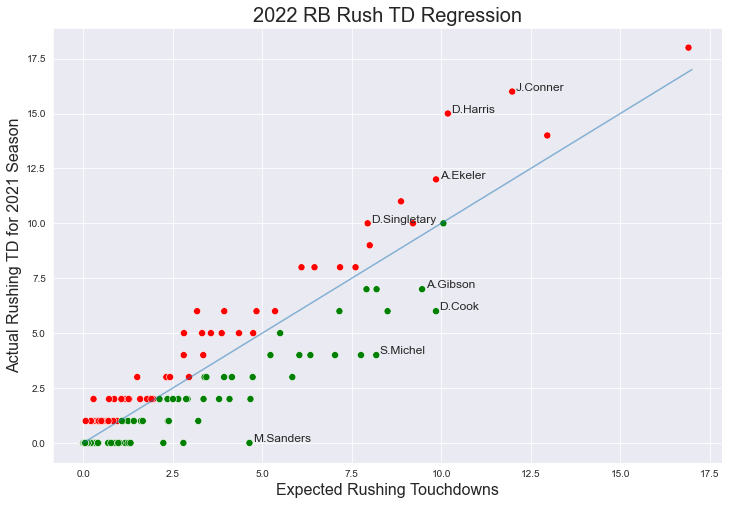

In [61]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(
    data = rush_2021_df,
    x = 'expected_touchdowns',
    y = 'season_rush_td_total',
    hue = 'positive_regression',
    palette= ['red', 'green'],
    s=50
);

max_actual = int(rush_2021_df['season_rush_td_total'].max())
max_expected = int(rush_2021_df['expected_touchdowns'].max())

max_td = max(max_actual, max_expected)

sns.lineplot(range(max_td), range(max_td), alpha = 0.5)

# top_deltas = rush_2021_df.sort_values(by='delta', ascending = False)[:5]

player_array = ['D.Harris', 'M.Sanders', 'S.Michel', 'J.Conner', 'D.Cook', 'D.Singletary', 'A.Gibson', 'A.Ekeler']

for index, row in rush_2021_df.iterrows():
    if row['rusher_player_name'] in player_array:
        ax.text(
            x = row['expected_touchdowns'] +.1,
            y = row['season_rush_td_total'] +0.05,
            s = row['rusher_player_name'],
            fontsize = 12
        )
ax.get_legend().remove()
ax.set_title ('2022 RB Rush TD Regression', fontsize =20)
ax.set_xlabel('Expected Rushing Touchdowns', fontsize =16)
ax.set_ylabel('Actual Rushing TD for 2021 Season', fontsize =16)